# Big Basket Cart Prediction

## Installing Apyori

In [ ]:
!pip install apyori
# Apyori is a Machine Learning algorithm which is used to gain insight into the structured relationships between different items involved.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing Dataset

In [6]:
data_set= pd.read_csv("Big Basket.com Cart Apriori.csv", header= None)

In [22]:
print(data_set.head)

<bound method NDFrame.head of                  0                    1         2             3   \
0           chutney                  NaN       NaN           NaN   
1              knor  ginger garlic paste  MTR Idli           NaN   
2            turkey          spirit fish  tomatoes     spaghetti   
3              eggs                  NaN       NaN           NaN   
4            kinley                  NaN       NaN           NaN   
...             ...                  ...       ...           ...   
7214  mineral water            green tea       NaN           NaN   
7215      green tea                  NaN       NaN           NaN   
7216  patanjali tea              chicken      eggs  french fries   
7217  mineral water                 milk      cake      brownies   
7218       neckrest         french fries       NaN           NaN   

                 4              5       6     7        8   \
0               NaN            NaN     NaN   NaN      NaN   
1               NaN            

In [17]:
transcation= []

for i in range(0, 7219):
  transcation.append([str(data_set.values[i, j]) for j in range(0, 20)])

In [ ]:
print(transcation)

## Apriori Training Dataset

In [32]:
# Support is an indication of how frequently the items appear in the data. 
# Confidence indicates the number of times the if-then statements are found true.
# lift is that item Y is likely to be bought if item X is bought
from apyori import apriori
backet_intelligence= apriori(transactions= transcation, min_support= 0.003, min_confidence= 0.2, min_lift= 3, min_length= 2, max_length= 2)

## Visualizing Result

### Raw Results

In [33]:
results= list(backet_intelligence)

In [34]:
results

[RelationRecord(items=frozenset({'burgers', 'almonds'}), support=0.005402410306136584, ordered_statistics=[OrderedStatistic(items_base=frozenset({'almonds'}), items_add=frozenset({'burgers'}), confidence=0.26530612244897955, lift=3.0594966421073218)]),
 RelationRecord(items=frozenset({'paneer', 'buns'}), support=0.016068707577226764, ordered_statistics=[OrderedStatistic(items_base=frozenset({'buns'}), items_add=frozenset({'paneer'}), confidence=0.32402234636871513, lift=3.2852771326344867)]),
 RelationRecord(items=frozenset({'chicken', 'ginger garlic paste'}), support=0.004571270259038648, ordered_statistics=[OrderedStatistic(items_base=frozenset({'ginger garlic paste'}), items_add=frozenset({'chicken'}), confidence=0.29203539823008845, lift=4.791371681415929)]),
 RelationRecord(items=frozenset({'vegetable basket', 'fruit basket'}), support=0.0055409336473195734, ordered_statistics=[OrderedStatistic(items_base=frozenset({'fruit basket'}), items_add=frozenset({'vegetable basket'}), conf

In [35]:
results[0]

RelationRecord(items=frozenset({'burgers', 'almonds'}), support=0.005402410306136584, ordered_statistics=[OrderedStatistic(items_base=frozenset({'almonds'}), items_add=frozenset({'burgers'}), confidence=0.26530612244897955, lift=3.0594966421073218)])

### Proper Display of Results

In [36]:
def incepect(results):
  product1= [tuple(result[2][0][0])[0] for result in results]
  product2= [tuple(result[2][0][1])[0] for result in results]
  supports= [result[1] for result in results]
  confidences= [result[2][0][2] for result in results]
  lifts= [result[2][0][3] for result in results]
  return list(zip(product1, product2, supports, confidences, lifts))

dataframe_intelligence= pd.DataFrame(incepect(results), columns= ["product1", "product2", "support", "confidence", "Lift"])

In [37]:
dataframe_intelligence

,product1,product2,support,confidence,Lift
0,almonds,burgers,0.005402,0.265306,3.059497
1,buns,paneer,0.016069,0.324022,3.285277
2,ginger garlic paste,chicken,0.004571,0.292035,4.791372
3,fruit basket,vegetable basket,0.005541,0.294118,3.081619
4,ginger garlic paste,olive oil,0.003325,0.212389,3.234681
5,kissan puree,paneer,0.005402,0.378641,3.839056
6,pasta,maggi,0.003463,0.247525,3.456250
7,pasta,mushroom,0.005402,0.386139,4.873312
8,pepper spray,mushroom,0.005818,0.302158,3.813428
9,neckrest,trolly bag,0.003463,0.271739,5.620873


In [38]:
dataframe_intelligence.nlargest(n= 10, columns= 'Lift')

,product1,product2,support,confidence,Lift
9,neckrest,trolly bag,0.003463,0.271739,5.620873
7,pasta,mushroom,0.005402,0.386139,4.873312
2,ginger garlic paste,chicken,0.004571,0.292035,4.791372
10,whole wheat pasta,olive oil,0.007757,0.266667,4.061322
5,kissan puree,paneer,0.005402,0.378641,3.839056
8,pepper spray,mushroom,0.005818,0.302158,3.813428
6,pasta,maggi,0.003463,0.247525,3.456250
1,buns,paneer,0.016069,0.324022,3.285277
4,ginger garlic paste,olive oil,0.003325,0.212389,3.234681
3,fruit basket,vegetable basket,0.005541,0.294118,3.081619


## Graph visualization

In [39]:
final= dataframe_intelligence.nlargest(n= 10, columns= 'Lift')

In [48]:
# saparating product pairs from the dataframe.
product_pairs= []

for i in range(len(final)):
  product_pairs.append((final.values[i, 0], final.values[i, 1]))

In [56]:
# saparating list value from dataframe.
lift_value= []

for i in range(len(final)):
  lift_value.append(final.values[i, -1])

In [72]:
print(product_pairs)
print(lift_value)

[('neckrest', 'trolly bag'), ('pasta', 'mushroom'), ('ginger garlic paste', 'chicken'), ('whole wheat pasta', 'olive oil'), ('kissan puree', 'paneer'), ('pepper spray', 'mushroom'), ('pasta', 'maggi'), ('buns', 'paneer'), ('ginger garlic paste', 'olive oil'), ('fruit basket', 'vegetable basket')]
[5.620873302603712, 4.873312331233124, 4.791371681415929, 4.061322081575246, 3.8390558525144542, 3.8134275796146295, 3.4562498803071797, 3.2852771326344867, 3.2346813039094875, 3.081618714249125]


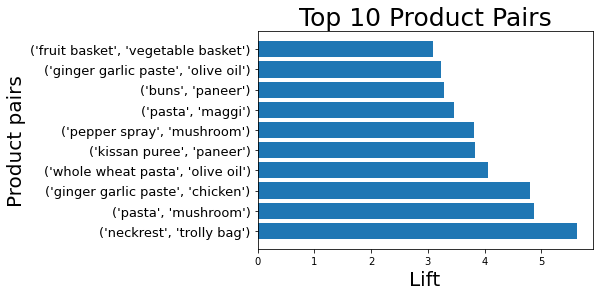

In [78]:
y_pos= np.arange(len(product_pairs))
plt.barh(y_pos, lift_value, align= 'center', alpha= 1)
plt.yticks(y_pos, product_pairs, fontsize= 13)
plt.xlabel("Lift", fontsize= 20)
plt.ylabel("Product pairs", fontsize= 20)
plt.title("Top 10 Product Pairs", fontsize= 25)
plt.show()